# Text Analysis of Titles Descriptions and Tags

In [1]:
import pandas as pd
import numpy as np
import re
import datetime  
import matplotlib.pyplot as plt

#natural language toolkit for list of stop words
import nltk 
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv('data/mergedData033122.csv')

## Titles and Descriptions

In [3]:
#make all title and descriptions lowercase
title = data['title_x'].str.lower()
desc = data['description'].str.lower()

In [4]:
#look at some titles
title.head(5)

0    handmade pottery vessel sinks mashima stamped ...
1    handmade pottery vessel sinks mishima stamped ...
2    custom small white oval handmade pottery vesse...
3    custom handmade blue pottery vessel sink, desi...
4    carved stoneware cup, wheel thrown mug, coffee...
Name: title_x, dtype: object

In [5]:
#look at some descriptions
desc.head(5)

0    vessel bathroom sink &quot;with no overflow&qu...
1    vessel bathroom sink &quot;with no overflow&qu...
2    oval vessel bathroom sink &quot;with no overfl...
3    this sink&#39;s got the blues\nyou get to choo...
4    carved red stoneware mug has full round shape ...
Name: description, dtype: object

### Looking at listings that contain specific products of interest

In [6]:
# function that returns percentage of listings that contain a specific word

def percentage_item(text, word):
    true = text[text.str.contains(' ' + word + ' ')==True]
    percent = len(true)/len(text)
    return percent

In [7]:
#percentage of listings that contain the word "mug" in the TITLE
percentage_item(title, "mug")

0.11891666666666667

In [8]:
#percentage of listings that contain the word "mug" in the DESCRIPTION
percentage_item(desc, "mug")

0.19291666666666665

In [9]:
#percentage of listings that contain a specific product in their title and description

items = ['mug', 'plate', 'bowl', 'jar', 'planter', 'berry bowl', 'butter dish', 'cup', 'tumbler', 'bacon cooker', 'spoon rest']

for i in items:
    print(i, percentage_item(title, i), percentage_item(desc, i))


mug 0.11891666666666667 0.19291666666666665
plate 0.024833333333333332 0.05383333333333333
bowl 0.07675 0.13108333333333333
jar 0.017083333333333332 0.019333333333333334
planter 0.01425 0.018166666666666668
berry bowl 0.0009166666666666666 0.0010833333333333333
butter dish 0.00225 0.0025833333333333333
cup 0.06691666666666667 0.11041666666666666
tumbler 0.00975 0.012666666666666666
bacon cooker 8.333333333333333e-05 0.0003333333333333333
spoon rest 0.00625 0.012083333333333333


### Remove punctuation, special characters and stop words from the titles and descriptons

In [10]:
# function that removes "\n", links, as well as special characters and numbers fromt text
def clean_text(text):
    for i in range (0, len(text)):
        n = '\n'
        string = text[i]
        if n in string:
            string = string.replace(n, " ")
            text[i] = string
        text[i] = re.sub("[^A-za-z]+"," ", text[i])
        text[i] = re.sub(r"http\S+","",text[i])
        text[i] = re.sub(r"www\S+","",text[i])

In [11]:
# Clean descriptions and titles
clean_text(desc)
clean_text(title)

In [12]:
#split the title strings on the spaces
title = title.str.split(" ")
desc = desc.str.split(" ")

In [52]:
## define the stopwords
stop = stopwords.words('english')

In [53]:
#add pottery-related keywords, and other irrelevant words to stopwords
stop.extend(['handmade','stoneware','pottery','ceramic','clay','x', '|','cm', 'oz', ' ', '', 'www', 'com',
'shipping','item','items','hand','made','piece','pieces','make','please','one','use','may','inches','also',
'high','etsy', 'quot'])

In [54]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### TO DO: GET THIS FUNCTION TO WORK 
I dont know if this is worth the time to fix, maybe just keep the for loops for now

In [15]:
#### TO DO: Turn this into a function (This function isn't working, fix later)
""" 
Args:
txt (series): the text as a series of lists
wrds (list): the stopwords to be removed from the list


"""
def remove_stopwords(txt, wrds):
    txt = txt.reset_index(drop=True) #reset the index
    for i in range (0, len(txt)):
        for s in wrds:
            list = txt[i]
            list = [w for w in list if w != s]
            txt[i] = list

In [64]:
#test = desc.iloc[11995:]
#test = test.reset_index(drop=True)

### Keetping these here for now but I really want the function to work with everything

In [70]:
# remove all instances of the stop words from the descriptions
for i in range (0, len(desc)):
    for s in stop:
        list = desc[i]
        list = [w for w in list if w != s]
        desc[i] = list

In [71]:
# remove all instances of the stop words from the titles
for i in range (0, len(title)):
    for s in stop:
        list = title[i]
        list = [w for w in list if w != s]
        title[i] = list

In [72]:
desc

0        [vessel, bathroom, sink, overflow, color, show...
1        [vessel, bathroom, sink, overflow, sizes, wide...
2        [oval, vessel, bathroom, sink, overflow, white...
3        [sink, got, blues, get, choose, shade, blue, s...
4        [carved, red, mug, full, round, shape, handle,...
                               ...                        
11995    [second, choice, product, handthrown, bowl, be...
11996    [hi, dear, friends, vintage, ashtray, traditio...
11997    [super, quality, vintage, french, pitcher, jug...
11998    [adorable, cat, cups, perfect, favorite, drink...
11999    [beautiful, grey, vase, unique, tones, white, ...
Name: description, Length: 12000, dtype: object

In [73]:
title

0        [vessel, sinks, mashima, stamped, design, wide...
1        [vessel, sinks, mishima, stamped, design, whit...
2        [custom, small, white, oval, vessel, sinks, de...
3        [custom, blue, vessel, sink, designed, bathroo...
4        [carved, cup, wheel, thrown, mug, coffee, mug,...
                               ...                        
11995              [rustic, bowl, second, choice, product]
11996    [vintage, ashtray, bulgarian, painted, vintage...
11997    [french, pitcher, beautiful, studio, wine, car...
11998                 [cat, cup, mug, white, glaze, light]
11999    [vase, flowers, home, decor, bedroom, country,...
Name: title_x, Length: 12000, dtype: object

### Save the cleaned descriptions and titles to csv to use for clustering algorithm

In [74]:
#title.to_csv('titles-cleaned.csv')
#desc.to_csv('descriptions-cleaned.csv')

### Word Counts

In [75]:
#define a function that reduces a column to a 1-dimensional series (to get word counts)
def oneD(column):
 return pd.Series([x for list in column for x in list])

In [76]:
#get the value counts for each of the words in the description
descWordCounts = oneD(desc).value_counts()

In [77]:
#look at top 50 words in the descriptions
top50desc = descWordCounts.head(50).sort_values(ascending=False)
top50desc

safe          10104
glaze          8983
mug            7396
dishwasher     6395
fired          5373
shop           5298
glazed         5278
unique         5267
microwave      5178
food           4987
bowl           4940
wheel          4353
free           4203
thrown         3870
white          3804
diameter       3632
glazes         3625
size           3507
gift           3468
blue           3437
order          3253
cup            3249
perfect        3094
height         3003
small          2945
color          2882
contact        2840
see            2792
beautiful      2781
tall           2770
coffee         2738
time           2596
set            2583
like           2582
days           2580
used           2544
wide           2506
mugs           2393
kiln           2334
great          2269
studio         2254
using          2222
approx         2212
note           2188
lead           2185
green          2183
oven           2146
plate          2144
listing        2111
questions      2109


In [78]:
#get the value counts for each of the words in the titles
titleWordCounts = oneD(title).value_counts()

In [79]:
#look at top 50 words in the titles
top50title = titleWordCounts.head(50).sort_values(ascending=False)
top50title

mug         6049
bowl        3296
coffee      2657
cup         2377
blue        1629
gift        1619
vase        1557
tea         1397
set         1351
thrown      1340
white       1146
plate       1102
dish        1065
wheel        897
large        889
green        873
small        800
pot          779
unique       772
glaze        771
vintage      684
holder       673
black        649
serving      648
rustic       647
decor        605
glazed       594
ceramics     525
mugs         524
jar          516
brown        493
spoon        458
flower       454
art          438
planter      422
studio       403
modern       388
kitchen      386
red          383
cups         372
bowls        371
pendant      370
jug          367
design       355
soap         350
speckled     335
home         333
rest         321
soup         314
tumbler      305
dtype: int64

## Tags

In [27]:
#make all tags lowercase
data['tags'] = data['tags'].str.lower()

In [28]:
#transform tags column from strings to lists
data['tags'] = data['tags'].apply(eval)

In [29]:
#look at the tags
data['tags']

0        [stoneware, home decor, decoration, jeff brown...
1        [stoneware, home decor, decoration, jeff brown...
2        [stoneware, home decor, decoration, jeff brown...
3        [stoneware, home decor, decoration, jeff brown...
4        [little pig pottery, coffee cup, tea cup, ston...
                               ...                        
11995    [stoneware, minimalist pottery, vintage cerami...
11996    [vintage ashtray, ceramic ashtray, trojan pott...
11997    [french stoneware jug, stoneware pitcher, ston...
11998    [white, gloss, glossy, cereal, soup, salad, pl...
11999    [birthday, flowers, vase, living room, bedroom...
Name: tags, Length: 12000, dtype: object

In [30]:
#get just the tags
tags = data['tags']

### Remove pottery-related stopwords from the tags

In [31]:
#define common stopwords
stopTags = ['handmade','stoneware','pottery','ceramic','clay','handmade pottery','stoneware pottery','ceramics','handmade ceramics']

In [32]:
#remove stop words from tags
for i in range (0, len(tags)):
    for s in stopTags:
        tags_list = tags[i]
        if s in tags_list:
            tags_list.remove(s)

In [33]:
#add clean tags to original df
data['clean_tags'] = tags
data['clean_tags']

0        [home decor, decoration, jeff brown pottery, s...
1        [home decor, decoration, jeff brown pottery, s...
2        [home decor, decoration, jeff brown pottery, s...
3        [home decor, decoration, jeff brown pottery, s...
4        [little pig pottery, coffee cup, tea cup, ston...
                               ...                        
11995    [minimalist pottery, vintage ceramics, tablewa...
11996    [vintage ashtray, ceramic ashtray, trojan pott...
11997    [french stoneware jug, stoneware pitcher, ston...
11998    [white, gloss, glossy, cereal, soup, salad, pl...
11999    [birthday, flowers, vase, living room, bedroom...
Name: clean_tags, Length: 12000, dtype: object

In [34]:
#get the value counts for each of the tags
tagCounts = oneD(tags).value_counts()

In [98]:
#look at top 50 tags
top50 = tagCounts.head(50).sort_values(ascending=False)
top50

coffee mug              1040
mug                     1007
stoneware mug            897
gift                     836
handmade mug             822
ceramic mug              807
pottery mug              729
wheel thrown             658
cup                      649
coffee                   626
coffee cup               613
blue                     594
bowl                     563
unique                   532
home decor               507
tea                      484
kitchen                  476
vase                     454
tea cup                  441
tea mug                  392
one of a kind            383
housewarming gift        378
green                    373
wheel thrown pottery     367
rustic                   357
ceramic bowl             351
stoneware bowl           344
handmade bowl            339
studio pottery           338
white                    330
handmade ceramic         317
ceramic cup              300
tableware                294
gift for her             274
stoneware vase

In [125]:
# the word "spoon" is appearing in the top words in the titles so I wanted to see what the related product is:
tagCounts[tagCounts.index.str.contains(pat = 'tumbler')]

tumbler                 103
ceramic tumbler         100
handmade tumbler         41
coffee tumbler           30
stoneware tumbler        30
                       ... 
pitcher and tumblers      1
shiny green tumbler       1
wine tumblers             1
sour cream tumbler        1
blue tumblers             1
Length: 119, dtype: int64

I repeated the above for all the top words in the titles that were products so I could see if they were normally used in a phrase like

Text(0.5, 1.0, 'Frequency of Top 50 Tags')

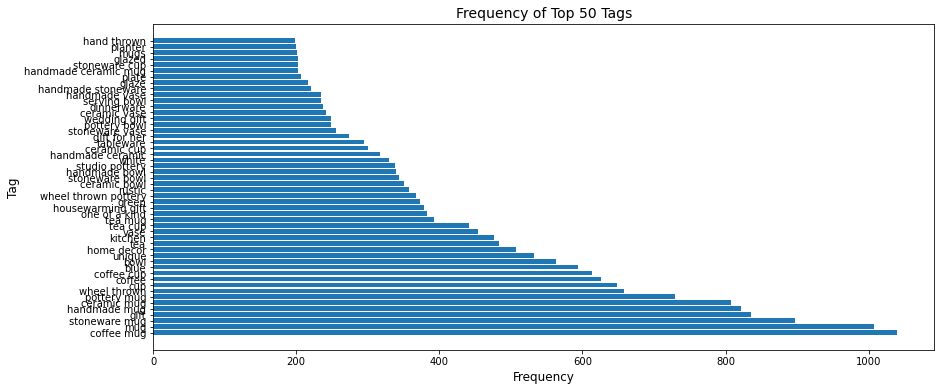

In [101]:
#Plot the top tags
fig, ax = plt.subplots(figsize = (14,6))
ax.barh(top50.index,top50.values)
ax.set_ylabel("Tag", size = 12)
ax.set_xlabel("Frequency", size = 12)
ax.set_title("Frequency of Top 50 Tags", size = 14)

### Get top 20 tags for top-favorited and top number-sold listings

In [37]:
#dataframe with tags, num of favorites
itemData = data[['listing_id','clean_tags','num_favorers_x']]

In [38]:
#look at top 20 listings according to number of favorers
itemData.sort_values(by = ['num_favorers_x'], ascending = False).head(20)

,listing_id,clean_tags,num_favorers_x
2679,175789619,"[best selling mug, gift under 50, gift for dad...",26374
551,792180615,"[ceramic mug, handpainted mug, nature mug, flo...",13334
1611,900330801,"[wheel thrown pottery, fine art ceramics, dini...",12995
759,1086863643,"[caffeine addict, coffee lover, gift for mom, ...",10207
3692,535025569,"[coffee cup, parceline, tea cup, coffee mug, c...",9671
6160,741218574,"[handmade ceramic mug, handmade mug, ceramic m...",8259
2317,128982522,"[etsymudteam, claylicious, stoneware berry bow...",7926
2114,677424431,"[handmade coffee mug, birthday gift mug, coffe...",7820
1835,635135322,"[platter, serving platter, gray, wabi sabi, mo...",7412
3099,614766345,"[pottery mug, black and white, turquoise, coff...",7317


In [39]:
#this is the 3,873 listings with at least 10 favorers
TenOrMore = itemData[itemData['num_favorers_x']>=10]
#TenOrMore.shape

In [40]:
#get the value counts for each of the tags in TenOrMore
tagCountsFavs = oneD(TenOrMore["clean_tags"]).value_counts()
top20Favs = tagCountsFavs.head(20).sort_values(ascending=True)

Text(0.5, 1.0, 'Top 20 Tags for Listings With at Least 10 Favorites')

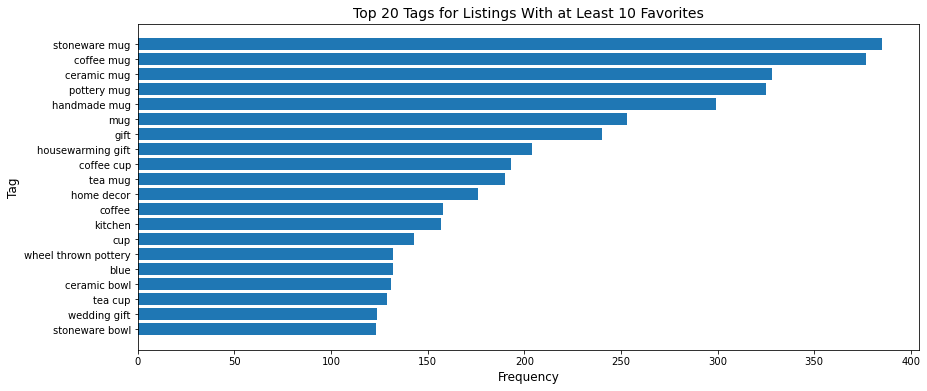

In [41]:
#create the bar chart
fig, ax = plt.subplots(figsize = (14,6))
ax.barh(top20Favs.index,top20Favs.values)
ax.set_ylabel("Tag", size = 12)
ax.set_xlabel("Frequency", size = 12)
ax.set_title("Top 20 Tags for Listings With at Least 10 Favorites", size = 14)

### Get top 20 tags for top-rated shops

In [42]:
#dataframe with tags, shop review count, and review average
shopData = data[['listing_id','clean_tags','num_favorers_x','review_average', 'review_count']]

In [43]:
shopData.sort_values(by = ['review_average'], ascending = False).head(20)

,listing_id,clean_tags,num_favorers_x,review_average,review_count
3751,1205153573,"[handmade mug, coffee mug, mug, big mug]",0,5.0,9.0
8576,1187378698,"[handmade mugs, pottery mug, hand carved mug, ...",2,5.0,116.0
10047,97390875,"[creamer and sugar, sugar bowl, cream pitcher,...",31,5.0,46.0
10048,782685277,"[party plates, pottery plates, trinket dishes,...",1,5.0,46.0
10049,272555896,"[serving dish, platter, home decor, housewares...",9,5.0,46.0
10050,241697043,"[ceramics and pottery, coffee mug, ceramic tea...",3,5.0,46.0
10051,200944512,"[handmade bowl, ceramic bowl, pottery and cera...",5,5.0,46.0
8578,1201317033,"[mug, pottery mug, wheel thrown mug, hand carv...",0,5.0,116.0
8577,1201322843,"[mug, pottery mug, wheel thrown mug, hand carv...",1,5.0,116.0
10056,1111622988,"[garden bells, hanging bells, pottery bells, s...",1,5.0,14.0


In [44]:
#this is the 9036 listings from shops with at least 10 reviews
TenReviews =  shopData[shopData['review_count']>=10]
#TenReviews

In [45]:
#get the value counts for each of the tags in TenReviews
tagCountsShops = oneD(TenReviews["clean_tags"]).value_counts()
top20Shops = tagCountsShops.head(20).sort_values(ascending=True)

Text(0.5, 1.0, 'Top 20 Tags for Listings from Shops with at Least 10 Reviews')

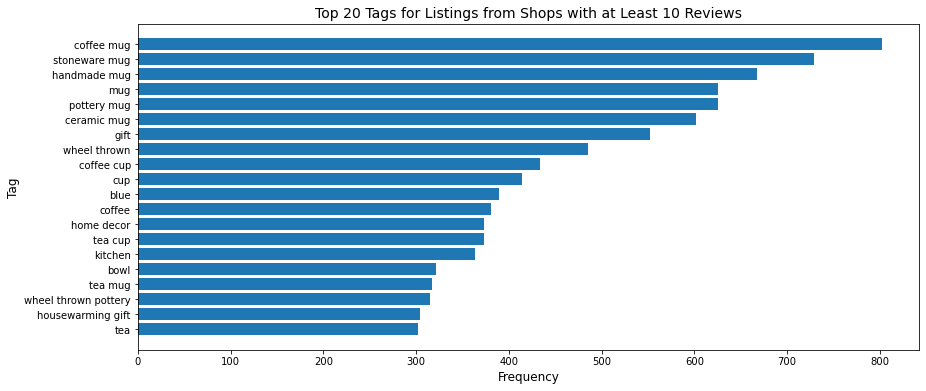

In [46]:
#create the bar chart
fig, ax = plt.subplots(figsize = (14,6))
ax.barh(top20Shops.index,top20Shops.values)
ax.set_ylabel("Tag", size = 12)
ax.set_xlabel("Frequency", size = 12)
ax.set_title("Top 20 Tags for Listings from Shops with at Least 10 Reviews", size = 14)